In [1]:
#Can returns can be Described with a normal distribution?
#Is there directional biased in daily changes?
#Can price movement be decribed as random walk
#!python -m pip install --upgrade scipy

You should consider upgrading via the 'C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
import seaborn as sn
sn.set()

In [3]:
amzn=pdr.get_data_yahoo('AMZN')

In [4]:
amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-13,50.344002,49.794998,50.230999,50.031502,57616000.0,50.031502
2017-07-14,50.222500,49.844501,50.119999,50.090500,42050000.0,50.090500
2017-07-17,50.737499,50.190498,50.234501,50.501999,74252000.0,50.501999
2017-07-18,51.301498,50.200001,50.299999,51.222500,80152000.0,51.222500
2017-07-19,51.579498,51.125000,51.250000,51.343498,59280000.0,51.343498
...,...,...,...,...,...,...
2022-07-06,115.480003,112.010002,113.209999,114.330002,66958900.0,114.330002
2022-07-07,116.989998,113.489998,113.849998,116.330002,57872300.0,116.330002
2022-07-08,116.580002,113.690002,114.599998,115.540001,45658200.0,115.540001


In [5]:
amzn_close=amzn['Close']
amzn_return=round(np.log(amzn_close).diff()*100,2)
amzn_return[amzn_return.values==0]

Date
2018-11-02    0.0
2021-12-08   -0.0
Name: Close, dtype: float64

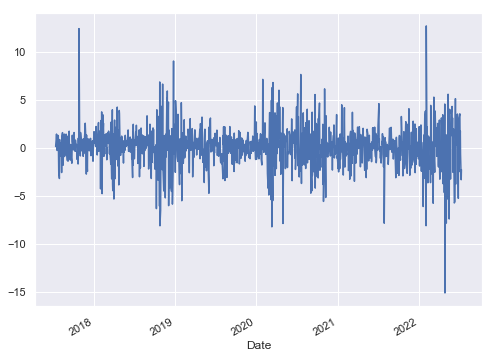

In [6]:
amzn_return.plot()
plt.show()

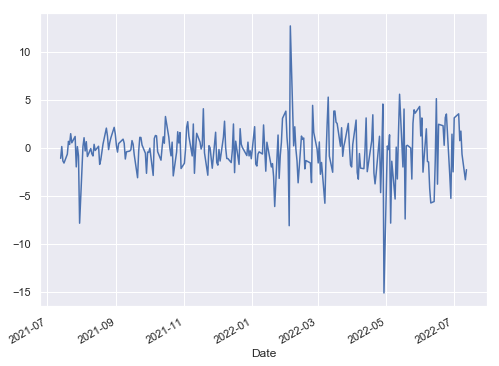

In [7]:
amzn_return[-252:].plot()#lastone year of data
plt.show()

In [8]:
from scipy import stats

In [9]:
amzn_return.describe()

count    1257.000000
mean        0.062148
std         2.119557
min       -15.140000
25%        -0.880000
50%         0.140000
75%         1.110000
max        12.690000
Name: Close, dtype: float64

In [10]:
stats.describe(amzn_return)

DescribeResult(nobs=1258, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

In [11]:
amzn_return.dropna(inplace=True)

In [12]:
stats.describe(amzn_return)#here  normal kurtosis of normaldistribution is 3 fkurtosis=real-normal(8.41-3)=5.41

DescribeResult(nobs=1257, minmax=(-15.14, 12.69), mean=0.062147971360381866, variance=4.49252070101698, skewness=-0.19593803181325314, kurtosis=5.418712369504064)

In [13]:
n,minmax,mean,var,skew,kurt=stats.describe(amzn_return)
mini,maxi=minmax
std=var**.5
std

2.119556722764687

In [14]:
from scipy.stats import norm

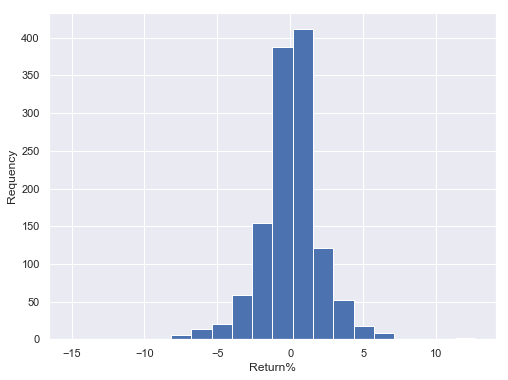

In [15]:
plt.hist(amzn_return, bins=20)
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [16]:
#making a normal distribution Using upper right skweed distribution mean,standard deviation,and obserbations
from scipy.stats import norm
x=norm.rvs(mean,std,n)

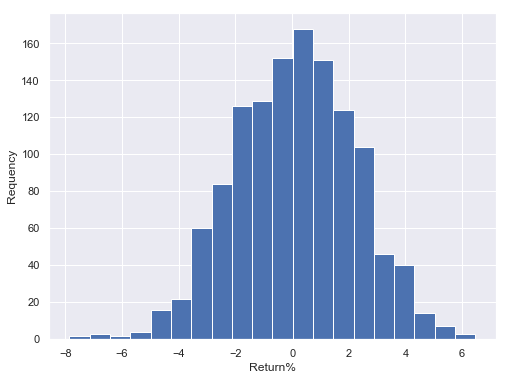

In [17]:
plt.hist(x, bins=20)
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [18]:
#Using scipy stats to test the kurtosis,the null hypothesis is that the sample is drawn from a population.
x_test=stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
x_test,amzn_test#25% chance to make a mistake by reject the null hypotes is that the distribution is't coming  from a normal distribution for x
#0% chance to make a mistake reject the null hypothesis the distribution is't drawn from normal distribution for amzn


(KurtosistestResult(statistic=0.12518833436717997, pvalue=0.9003744524151256),
 KurtosistestResult(statistic=12.439777894525712, pvalue=1.5894526872308288e-35))

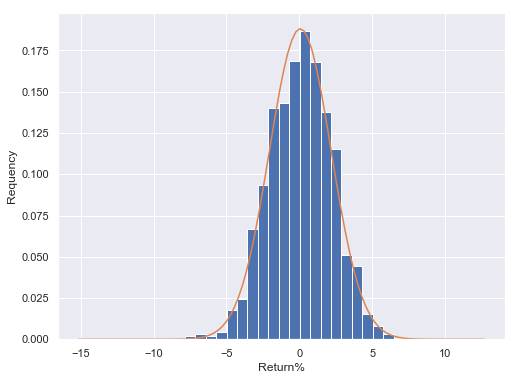

In [19]:
overly=np.linspace(mini,maxi,100)
plt.hist(x, bins=20,edgecolor='w',density=True)
plt.plot(overly,norm.pdf(overly,mean,std))
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

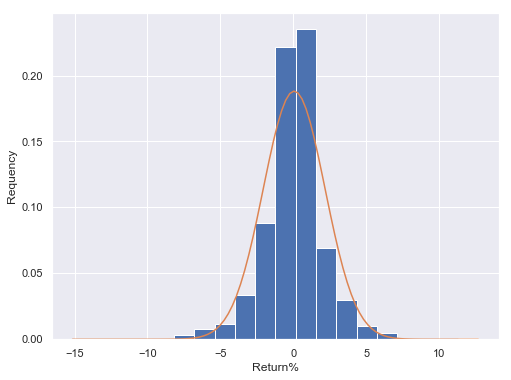

In [20]:
overly=np.linspace(mini,maxi,100)
plt.hist(amzn_return, bins=20,edgecolor='w',density=True)
plt.plot(overly,norm.pdf(overly,mean,std))
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [21]:
#Condcd simple hypothesis test (null hypothesis is price change is on average 0)#no directional biased
stats.ttest_1samp(amzn_return,0)#if it is smaller than 0 and larger than 0 than we can say it has directional biased
#If our alternative hypothesis is that the mean is greater than 0, then we reject the null hypothesis when p/2 < 0.05 and t > 0.
#If our alternative hypothesis is that the mean is less than 0, then we reject the null hypothesis when p/2 < 0.5 and t < 0.

Ttest_1sampResult(statistic=1.0395599804771078, pvalue=0.2987444515512161)

In [22]:
stats.ttest_1samp(amzn_return.sample(252),0)#using random 1 year equivalent data

Ttest_1sampResult(statistic=0.5967387879433055, pvalue=0.5512196412736704)

In [23]:
#Can price movement be described as a random walk
amzn_close=pd.DataFrame(amzn_close,columns=['Close'])
amzn_close['lag_1']=amzn.Close.shift(1)
amzn_close['lag_2']=amzn.Close.shift(2)
amzn_close['lag_4']=amzn.Close.shift(4)
amzn_close['lag_9']=amzn.Close.shift(9)
amzn_close.dropna(inplace=True)
amzn_close.head()

,Close,lag_1,lag_2,lag_4,lag_9
Date,,,,,
2017-07-26,52.639999,51.993500,51.947498,51.435001,50.031502
2017-07-27,52.299999,52.639999,51.993500,51.283501,50.090500
2017-07-28,51.001999,52.299999,52.639999,51.947498,50.501999
2017-07-31,49.389000,51.001999,52.299999,51.993500,51.222500
2017-08-01,49.809502,49.389000,51.001999,52.639999,51.343498


In [24]:
lr=np.linalg.lstsq(amzn_close[['lag_1','lag_2','lag_4','lag_9']],amzn_close['Close'],rcond=None)[0]

In [25]:
amzn_close['Prediction']=np.dot(amzn_close[['lag_1','lag_2','lag_4','lag_9']],lr)

In [26]:
amzn_close

,Close,lag_1,lag_2,lag_4,lag_9,Prediction
Date,,,,,,
2017-07-26,52.639999,51.993500,51.947498,51.435001,50.031502,51.980741
2017-07-27,52.299999,52.639999,51.993500,51.283501,50.090500,52.606698
2017-07-28,51.001999,52.299999,52.639999,51.947498,50.501999,52.295256
2017-07-31,49.389000,51.001999,52.299999,51.993500,51.222500,51.035425
2017-08-01,49.809502,49.389000,51.001999,52.639999,51.343498,49.465135
...,...,...,...,...,...,...
2022-07-06,114.330002,113.500000,109.559998,108.919998,108.949997,113.379521
2022-07-07,116.330002,114.330002,113.500000,106.209999,112.440002,114.205389
2022-07-08,115.540001,116.330002,114.330002,109.559998,116.459999,116.219676


In [27]:
amzn_close.iloc[0][1]*lr[0]+amzn_close.iloc[0][2]*lr[1]+amzn_close.iloc[0][3]*lr[2]+amzn_close.iloc[0][4]*lr[3]

51.98074148800028

In [28]:
amzn_close.iloc[0]

Close         52.639999
lag_1         51.993500
lag_2         51.947498
lag_4         51.435001
lag_9         50.031502
Prediction    51.980741
Name: 2017-07-26 00:00:00, dtype: float64

In [29]:
amzn_close.iloc[0][2]

51.9474983215332

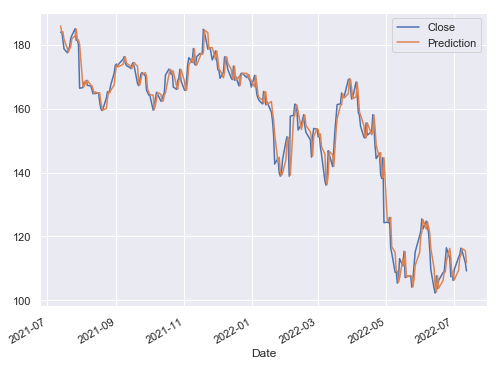

In [30]:
amzn_close.iloc[-252:][['Close', 'Prediction']].plot()
plt.show()